In [17]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU

#step에 따른 log를 추출, 중간과정을 확인 가능
def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )


In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [76]:
model = Sequential()

model.add(Dense(5, input_dim=2)) #첫번째 층 학습할개수 15개 ( 5개 뉴런+ input2개 + bios)
model.add(Activation('sigmoid'))

model.add(Dense(5, input_dim=2))  
model.add(Activation('sigmoid'))

model.add(Dense(5, input_dim=2))  
model.add(Activation('sigmoid'))

model.add(Dense(5, input_dim=2))  
model.add(Activation('sigmoid'))

model.add(Dense(5, input_dim=2))  
model.add(Activation('sigmoid'))

model.add(Dense(5, input_dim=2))  
model.add(Activation('sigmoid'))

model.add(Dense(5, input_dim=2))  
model.add(Activation('sigmoid'))

#맨 마지막은 출력층 
model.add(Dense(1)) #출력층 개수 / 두번째 학습할 6개 (input 5개 + bios)
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5)                 15        
_________________________________________________________________
activation_16 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 30        
_________________________________________________________________
activation_17 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 30        
_________________________________________________________________
activation_18 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 30        
__________

In [77]:
#학습시키기
#batch size는 학습시 넣을 데이터수 epochs는 학습 횟수
model.fit(X, y, batch_size=4, epochs=3200, verbose=0)
print(model.predict(X))  # 행렬은 4x1이다.  smaple 수 x 클래스수이미르

[[0.01893127]
 [0.6649202 ]
 [0.66492623]
 [0.66495216]]


In [78]:
p=model.predict(X)
print(p>0.5)

[[False]
 [ True]
 [ True]
 [ True]]


In [80]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)

(2500, 2)


<class 'numpy.ndarray'>
(2500, 1)


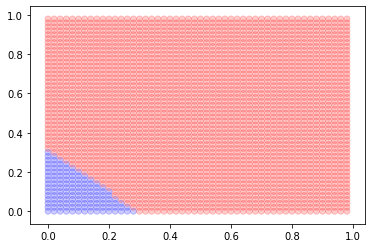

In [81]:
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

(500,)


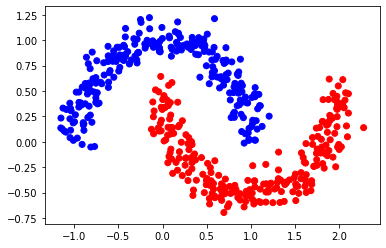

In [3]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.1)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)


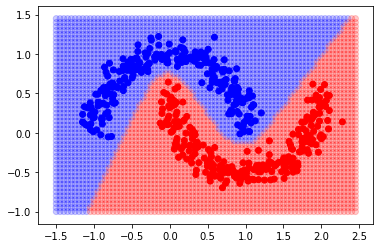

In [14]:
model.add(Dense(5, input_dim=2)) #첫번째 층 학습할개수 15개 ( 5개 뉴런+ input2개 + bios)
model.add(Activation('sigmoid'))

model.add(Dense(5))  
model.add(Activation('sigmoid'))

#맨 마지막은 출력층 
model.add(Dense(1)) #출력층 개수 / 두번째 학습할 6개 (input 5개 + bios)
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(0.01))

#학습시키기
#batch size는 학습시 넣을 데이터수 epochs는 학습 횟수
model.fit(x_data, y_data, batch_size=100, epochs=200, verbose=0)

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0) 

xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]

h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

0 => {'val_loss': 0.6946276545524597, 'val_acc': 0.49999998807907103, 'loss': 0.7020658493041992, 'acc': 0.49999999403953554}
500 => {'val_loss': 0.0005404379335232079, 'val_acc': 1.0, 'loss': 0.0005419985391199589, 'acc': 1.0}
1000 => {'val_loss': 9.40684913075529e-05, 'val_acc': 1.0, 'loss': 9.424040035810322e-05, 'acc': 1.0}
1500 => {'val_loss': 2.404477054369636e-05, 'val_acc': 1.0, 'loss': 2.4082441814243794e-05, 'acc': 1.0}
2000 => {'val_loss': 6.657566063950071e-06, 'val_acc': 1.0, 'loss': 6.674076485069236e-06, 'acc': 1.0}
2500 => {'val_loss': 1.8832703517546178e-06, 'val_acc': 1.0, 'loss': 1.8828530301107094e-06, 'acc': 1.0}
3000 => {'val_loss': 5.266666676106979e-07, 'val_acc': 1.0, 'loss': 5.262494255475759e-07, 'acc': 1.0}
3500 => {'val_loss': 1.773209902466988e-07, 'val_acc': 1.0, 'loss': 1.786031987194292e-07, 'acc': 1.0}
4000 => {'val_loss': 1.146832232734596e-07, 'val_acc': 1.0, 'loss': 1.1457728845698512e-07, 'acc': 1.0}
4500 => {'val_loss': 1.0987754563984709e-07, 'va

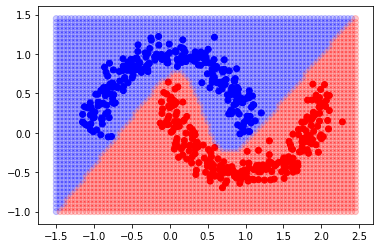

In [24]:
model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])

#metrics에 따라서 다른 값이 나옴..? 무슨값이 다르다는것이지
model.compile(loss='binary_crossentropy', optimizer=Adam(0.01),metrics=['accuracy'])  

#callbacks 를사용하여, 회수별 loss 값 파악
model.fit(x_data, y_data, batch_size=100, epochs=5000, verbose=0,
          validation_data=(x_data, y_data),callbacks=[printepoch(500)]) #verbose는 실행되는 과정을 보여줄것인지 아닐 것인지 

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

0 => {'val_loss': 0.6198415756225586, 'val_acc': 0.7340000152587891, 'loss': 0.646339499950409, 'acc': 0.6880000054836273}
500 => {'val_loss': 6.04424976700102e-06, 'val_acc': 1.0, 'loss': 6.187284191128128e-06, 'acc': 1.0}
1000 => {'val_loss': 9.368205780901917e-07, 'val_acc': 1.0, 'loss': 9.423642922001818e-07, 'acc': 1.0}
1500 => {'val_loss': 2.753719854808878e-07, 'val_acc': 1.0, 'loss': 2.766833318901263e-07, 'acc': 1.0}
2000 => {'val_loss': 1.4589605683568153e-07, 'val_acc': 1.0, 'loss': 1.4553843499243158e-07, 'acc': 1.0}
2500 => {'val_loss': 1.1762615486077266e-07, 'val_acc': 1.0, 'loss': 1.1758773581505011e-07, 'acc': 1.0}
3000 => {'val_loss': 1.1150805505621974e-07, 'val_acc': 1.0, 'loss': 1.1083517676979682e-07, 'acc': 1.0}
3500 => {'val_loss': 1.0970268533583294e-07, 'val_acc': 1.0, 'loss': 1.0997952415436885e-07, 'acc': 1.0}
4000 => {'val_loss': 1.0960466028109294e-07, 'val_acc': 1.0, 'loss': 1.0970268817800389e-07, 'acc': 1.0}
4500 => {'val_loss': 1.0960466028109294e-07, 

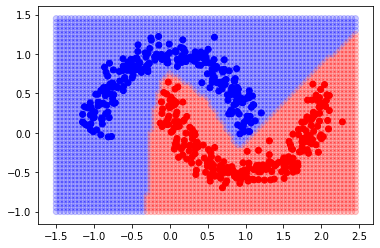

In [26]:
model = Sequential([
    Dense(5, activation=LeakyReLU(alpha=0.1),input_dim=2),
    Dense(5, activation=LeakyReLU(alpha=0.1)),
    Dense(5, activation=LeakyReLU(alpha=0.1)),
    Dense(5, activation=LeakyReLU(alpha=0.1)),
    Dense(1, activation='sigmoid'),
])

#metrics에 따라서 다른 값이 나옴..? 무슨값이 다르다는것이지
model.compile(loss='binary_crossentropy', optimizer=Adam(0.01),metrics=['accuracy'])  

#callbacks 를사용하여, 회수별 loss 값 파악
model.fit(x_data, y_data, batch_size=100, epochs=5000, verbose=0,
          validation_data=(x_data, y_data),callbacks=[printepoch(500)]) #verbose는 실행되는 과정을 보여줄것인지 아닐 것인지 

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

In [27]:
def createModel(layers, activation, input_dim) :    
    model = Sequential()        
    d = layers.pop(0)
    model.add(Dense(d, activation=activation,input_dim =input_dim))
    for l in layers :
        model.add(Dense(l, activation=activation))
    model.add(Dense(1, activation='sigmoid'))    
    return model

    
model = createModel([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5], LeakyReLU(alpha=0.1), 2) 



